In [1]:
# Importing our dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Importing our data
path = 'Resources/heart_disease_data.csv'
df = pd.read_csv(path)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
len(df)

319795

In [4]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
# Find null values
for column in df.columns:
    print(f'{column}: {df[column].isnull().sum()} null values')

HeartDisease: 0 null values
BMI: 0 null values
Smoking: 0 null values
AlcoholDrinking: 0 null values
Stroke: 0 null values
PhysicalHealth: 0 null values
MentalHealth: 0 null values
DiffWalking: 0 null values
Sex: 0 null values
AgeCategory: 0 null values
Race: 0 null values
Diabetic: 0 null values
PhysicalActivity: 0 null values
GenHealth: 0 null values
SleepTime: 0 null values
Asthma: 0 null values
KidneyDisease: 0 null values
SkinCancer: 0 null values


In [7]:
# Find duplicate entries
print(f'Duplicate entries: {df.duplicated().sum()}')

Duplicate entries: 18078


In [8]:
# Find unique entries
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

### Fixing Diabetic column

In [9]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [10]:
x = {'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1, 'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1}   
df = df.replace(x)
df['Diabetic'].value_counts()

0    276434
1     43361
Name: Diabetic, dtype: int64

In [11]:
# Rechecking data types
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

### Looking at other categorical columns

In [12]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [13]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [14]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

## Correlation to find out best features

In [15]:
correlation = df.corr()

In [16]:
correlation['HeartDisease']

HeartDisease        1.000000
BMI                 0.051803
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
Sex                 0.070040
Diabetic            0.174782
PhysicalActivity   -0.100030
SleepTime           0.008327
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
Name: HeartDisease, dtype: float64

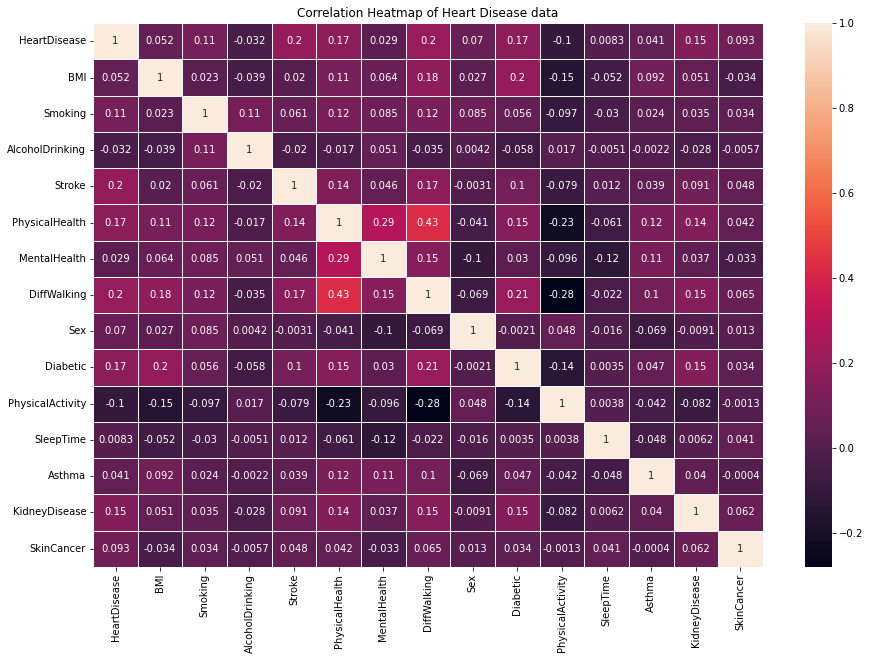

In [17]:
# Plotting the heatmap of correlation
plt.figure(figsize = (15,10))
heat_map = sns.heatmap(correlation, linewidth = 1 , annot = True)
plt.title('Correlation Heatmap of Heart Disease data')
plt.show()

## Encoding categorical variables

In [18]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

In [19]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names_out(df_cat)
encode_df.head()

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Merge one-hot encoded features and drop the originals
encoded_df = df.merge(encode_df, left_index=True, right_index=True).drop(df_cat, 1)
encoded_df.head()

C:\Users\Zarif\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## ML Model

In [21]:
# Remove heart disease outcome target from features data and sleep time since it has very weak correlation with heart disease
X = encoded_df.drop(columns=['HeartDisease', 'SleepTime']).values
y = encoded_df.HeartDisease.values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [22]:
# Normalizing the data

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 40

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = "relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = "relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3800      
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2291 - accuracy: 0.9153
Epoch 2/100
7496/7496 [==============================] - 13s 2ms/step - loss: 0.2259 - accuracy: 0.9161
Epoch 3/100
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2250 - accuracy: 0.9165
Epoch 4/100
7496/7496 [==============================] - 13s 2ms/step - loss: 0.2247 - accuracy: 0.9164
Epoch 5/100
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2242 - accuracy: 0.9166
Epoch 6/100
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2239 - accuracy: 0.9168
Epoch 7/100
7496/7496 [==============================] - 14s 2ms/step - loss: 0.2236 - accuracy: 0.9168
Epoch 8/100
7496/7496 [==============================] - 15s 2ms/step - loss: 0.2233 - accuracy: 0.9171
Epoch 9/100
7496/7496 [==============================] - 15s 2ms/step - loss: 0.2228 - accuracy: 0.9173
Epoch 10/100
7496/7496 [==============================] - 13s 2m

7496/7496 [==============================] - 12s 2ms/step - loss: 0.2062 - accuracy: 0.9240
Epoch 80/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2063 - accuracy: 0.9242
Epoch 81/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2059 - accuracy: 0.9242
Epoch 82/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2057 - accuracy: 0.9241
Epoch 83/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2058 - accuracy: 0.9242
Epoch 84/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2058 - accuracy: 0.9244
Epoch 85/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2056 - accuracy: 0.9243
Epoch 86/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2054 - accuracy: 0.9246
Epoch 87/100
7496/7496 [==============================] - 12s 2ms/step - loss: 0.2055 - accuracy: 0.9245
Epoch 88/100
7496/7496 [==============================] - 12s 2ms/st

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2499/2499 - 3s - loss: 0.2573 - accuracy: 0.9117 - 3s/epoch - 1ms/step
Loss: 0.25734949111938477, Accuracy: 0.9117437601089478
